In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns
from sklearn.metrics import f1_score , accuracy_score ,precision_score , recall_score , confusion_matrix , precision_recall_curve

In [2]:
# Importing required tensorflow functions
import tensorflow as tf
tf.random.set_seed(221)                             # pip install tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam

In [3]:
def prediction_maker(Y_hat,Y_test):
    precision, recall, thresholds = precision_recall_curve(Y_test, Y_hat)
    fscore = (2 * precision * recall) / (precision + recall)
    ix = np.argmax(fscore) 

    Y_pred_new = []
    for i in range(len(Y_hat)) : 
        if Y_hat[i] < thresholds[ix] :
            Y_pred_new.append(0)
        else :  
            Y_pred_new.append(1) 

    return Y_pred_new , thresholds[ix]

In [4]:
def confusion_matrix_plot(Y_test,y_pred):
    plt.figure(figsize=(6,6))
    data = confusion_matrix(Y_test,y_pred) 
    l = ['Normal','Fraud']
    sns.heatmap(data,annot= True,annot_kws= {'size':18},fmt= 'd',linewidths= .5,cmap= 'vlag',square= True,xticklabels= l ,yticklabels= l)
    plt.title('Confusion Matrix')
    plt.ylabel('Actual transaction')
    plt.xlabel('Predicted transaction')

In [5]:
X_train = pd.read_csv("C:/Users/prane/Downloads/Github/CREDIT-CARD-FRAUD-DETECTION/X_train.csv").to_numpy()
Y_train = pd.read_csv("C:/Users/prane/Downloads/Github/CREDIT-CARD-FRAUD-DETECTION/Y_train.csv").to_numpy().ravel()
X_test = pd.read_csv("C:/Users/prane/Downloads/Github/CREDIT-CARD-FRAUD-DETECTION/X_test.csv").to_numpy()  
Y_test = pd.read_csv("C:/Users/prane/Downloads/Github/CREDIT-CARD-FRAUD-DETECTION/Y_test.csv").to_numpy().ravel()

In [6]:
[[ X_train.shape , Y_train.shape ],[ X_test.shape , Y_test.shape ]]

[[(220530, 29), (220530,)], [(55133, 29), (55133,)]]

In [7]:
# Creating the layers of Neural Network.
model = Sequential([
                        tf.keras.Input(shape=(29,)),
                        Dense(units=20,activation='relu'),
                        Dense(units=7,activation='relu'),
                        Dense(units=5,activation='relu'),
                        Dense(units=1,activation='sigmoid'),
])

In [8]:
# Setting the Cost Function and Optimisation method.
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

In [9]:
# Fitting the train data to neural network model
model.fit(X_train,Y_train,epochs=24)

Epoch 1/24
6892/6892 [==============================] - 11s 1ms/step - loss: 0.0088
Epoch 2/24
6892/6892 [==============================] - 10s 1ms/step - loss: 0.0033
Epoch 3/24
6892/6892 [==============================] - 13s 2ms/step - loss: 0.0030
Epoch 4/24
6892/6892 [==============================] - 17s 2ms/step - loss: 0.0028
Epoch 5/24
6892/6892 [==============================] - 14s 2ms/step - loss: 0.0026
Epoch 6/24
6892/6892 [==============================] - 13s 2ms/step - loss: 0.0025
Epoch 7/24
6892/6892 [==============================] - 12s 2ms/step - loss: 0.0024
Epoch 8/24
6892/6892 [==============================] - 12s 2ms/step - loss: 0.0024
Epoch 9/24
6892/6892 [==============================] - 12s 2ms/step - loss: 0.0022
Epoch 10/24
6892/6892 [==============================] - 12s 2ms/step - loss: 0.0022
Epoch 11/24
6892/6892 [==============================] - 12s 2ms/step - loss: 0.0022
Epoch 12/24
6892/6892 [==============================] - 12s 2ms/step - lo

In [10]:
# Getting the output values for the test data
y_ = model.predict(X_test)

1723/1723 [==============================] - 3s 2ms/step


In [11]:
# Converting the output data to 1 and 0 based on threshold of 0.5
y = tf.round(y_)

In [12]:
# Changing the threshold value of 0.5 to another suited value to obtain better results
Y , threshold= prediction_maker(y_,Y_test)

In [13]:
# The value of threshold
threshold

0.40638655

In [14]:
accuracy_score(Y_test , y)

0.9994558612809026

In [15]:
accuracy_score(Y_test , Y)

0.999492137195509

In [16]:
precision_score(Y_test , y , average = 'macro')

0.9450056973961158

In [17]:
precision_score(Y_test , Y , average = 'macro')

0.9194130635151123

In [18]:
recall_score(Y_test , y , average = 'macro')

0.8734905518936931

In [19]:
recall_score(Y_test , Y , average = 'macro')

0.9194130635151123

In [20]:
f1_score(Y_test , y , average = 'macro')

0.9061137676420904

In [21]:
f1_score(Y_test , Y , average = 'macro')

0.9194130635151123

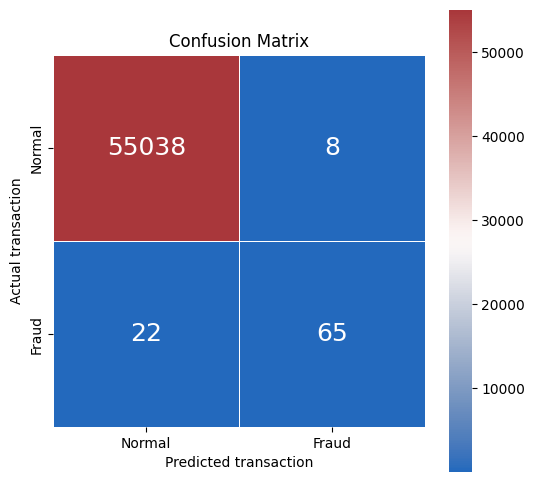

In [22]:
confusion_matrix_plot(Y_test,y)

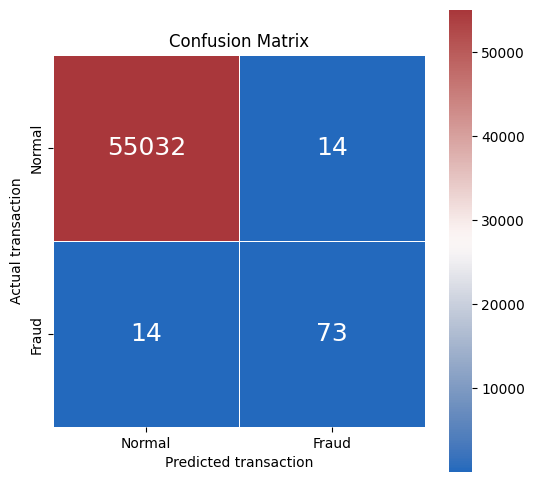

In [23]:
confusion_matrix_plot(Y_test,Y)

In [24]:
# Saving the weights of Neural Network.
model.save_weights('NN_model_weights.h5')